In [1]:
# step 1: import relevant libraries
import pandas as pd

In [2]:
# step 2: import the dataset into pandas dataframe
# s = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Salary%20Data.csv')
# URLError: <urlopen error [Errno 110] Connection timed out>
s = pd.read_csv('./Salary Data.csv')

In [3]:
s.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [4]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [5]:
s.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [6]:
s.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [7]:
s.shape

(40, 2)

1. AI = human like
2. ML = predict, estimate forecast
3. DL = tackles same problems but using Artificial Neural Networks
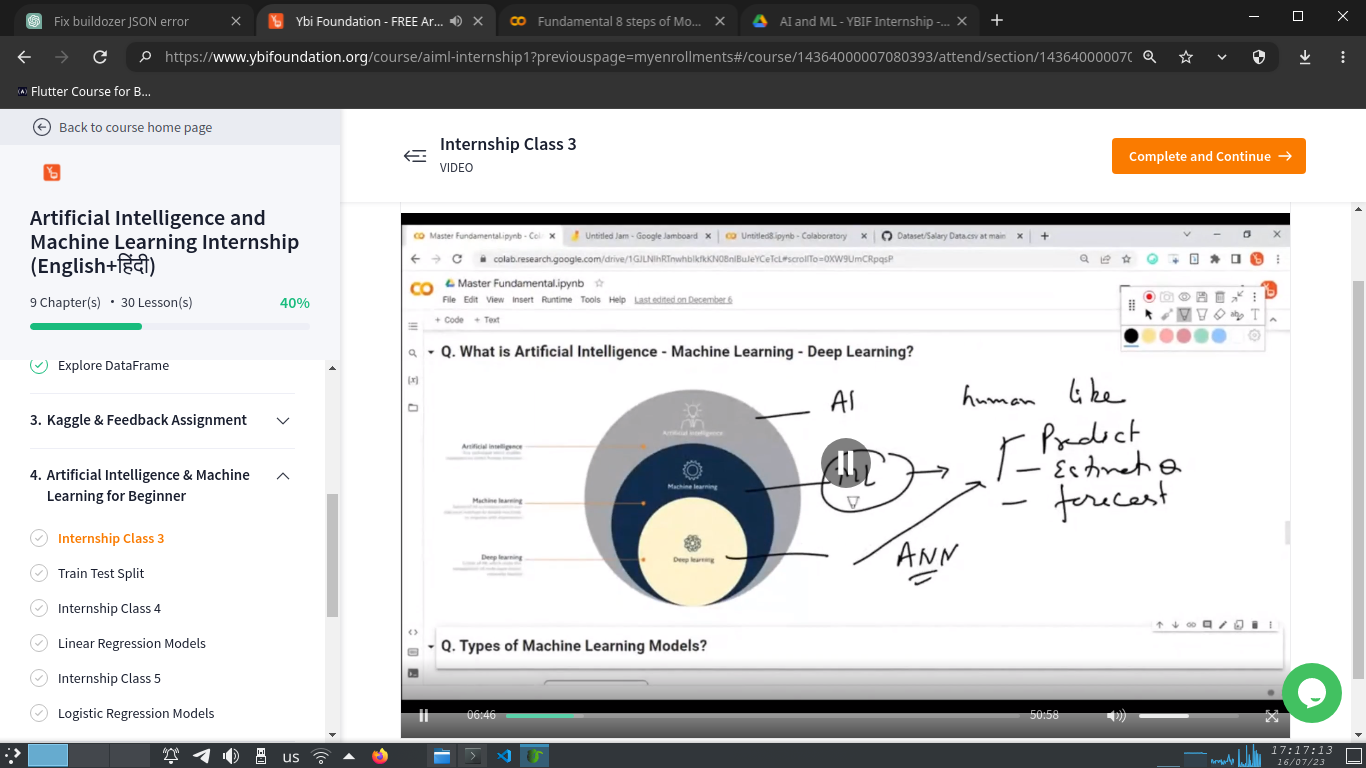
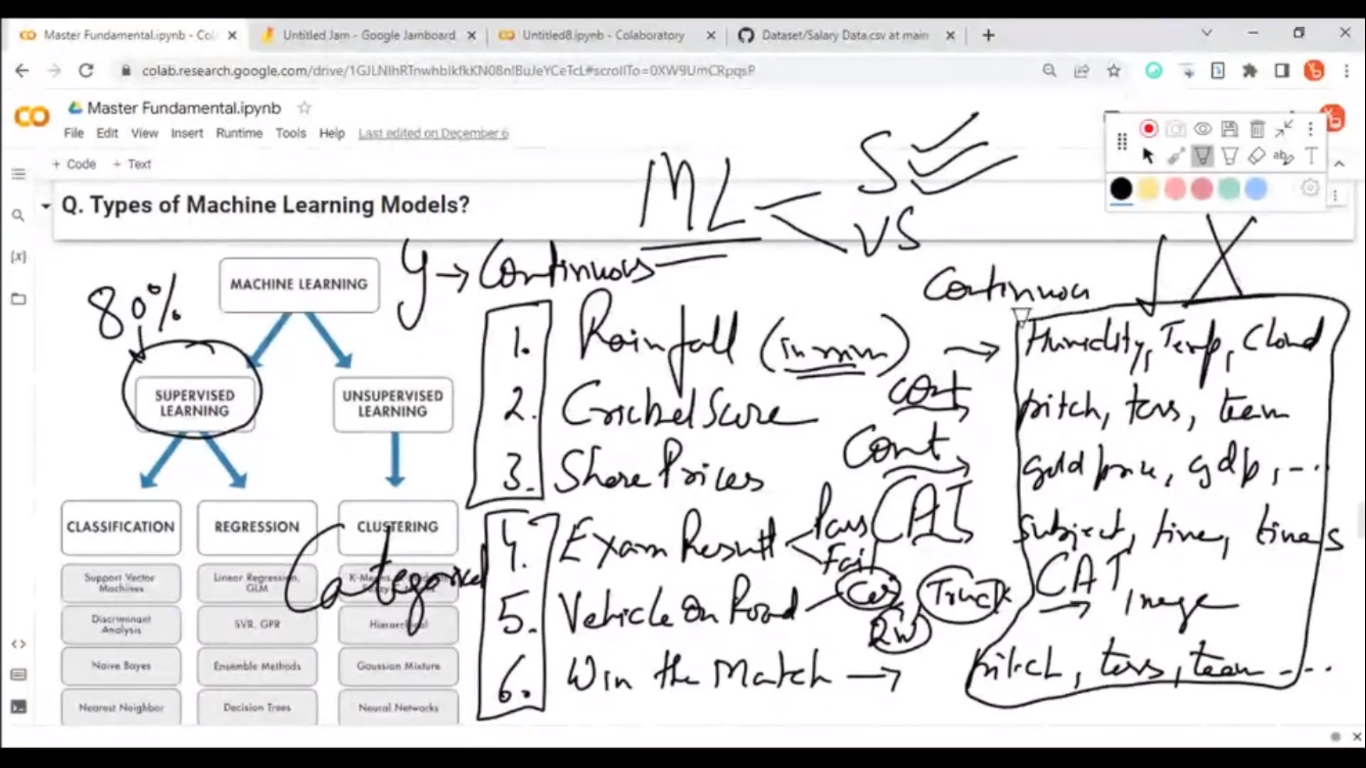

In [8]:
# step 3: define target (y) -> discrete/continuous -> decide whether it is a classification problem or regression problem
#         define feature(s) (x) -> x can be of any nature discrete or continuous
# understand the problem well, what you have to predict, what you are provided with, etc.
# e.g. you cannot predict experience using salaray as an increase or decrease in salaray doesn't give any information about your experience,
# (agar apki salary badha du toh kya iska yeh artha hoga ki apka experience badh gaya hai?)
# but your experience definity gives an idea of what your salary should be.

# in this specific case, we can use the given dataset to predict what should be the salary of a person given his/her experience
# and since salray is a continuous variable, i.e. it can take possibly any value (though might be with in a limited range),
# therefore its a regression problem

In [9]:
# firstly split out the target and features from the dataset
y = s['Salary']               # dependent variable (target)
x = s[['Experience Years']]   # independent variable (feature)

In [10]:
print(f'{type(y) = }\n{y.shape = }\n{y.dtypes = }') # -> y is a row vector due to []

type(y) = <class 'pandas.core.series.Series'>
y.shape = (40,)
y.dtypes = dtype('int64')


In [11]:
print(f'{type(x) = }\n{x.shape = }\n{x.dtypes = }\n{x.columns = }') # -> x is a column vector due to [[]]

type(x) = <class 'pandas.core.frame.DataFrame'>
x.shape = (40, 1)
x.dtypes = Experience Years    float64
dtype: object
x.columns = Index(['Experience Years'], dtype='object')


In [12]:
# why is it so? y is a row vector and x is a column vector as in linear algebra matrix multiplication is only possible if it satisfies:
# A[mxn] and B[nxo] are two matrices, notice that number of columns of A are qual to the number of rows of B

Remember that we splitted the target and dataset earlier? now we do have to split both of them again in equal proportions for obtaining:
1. Training dataset which would be used to train the model.
2. Testing dataset so that we can test the trained model in order to verify its functioning.
After you have trained the model, rather than testing it in the field (which can be very time consuming depending upon the nature of problem) it's a good idea to use 75% of the dataset to train the model and the remingin 25% for testing.
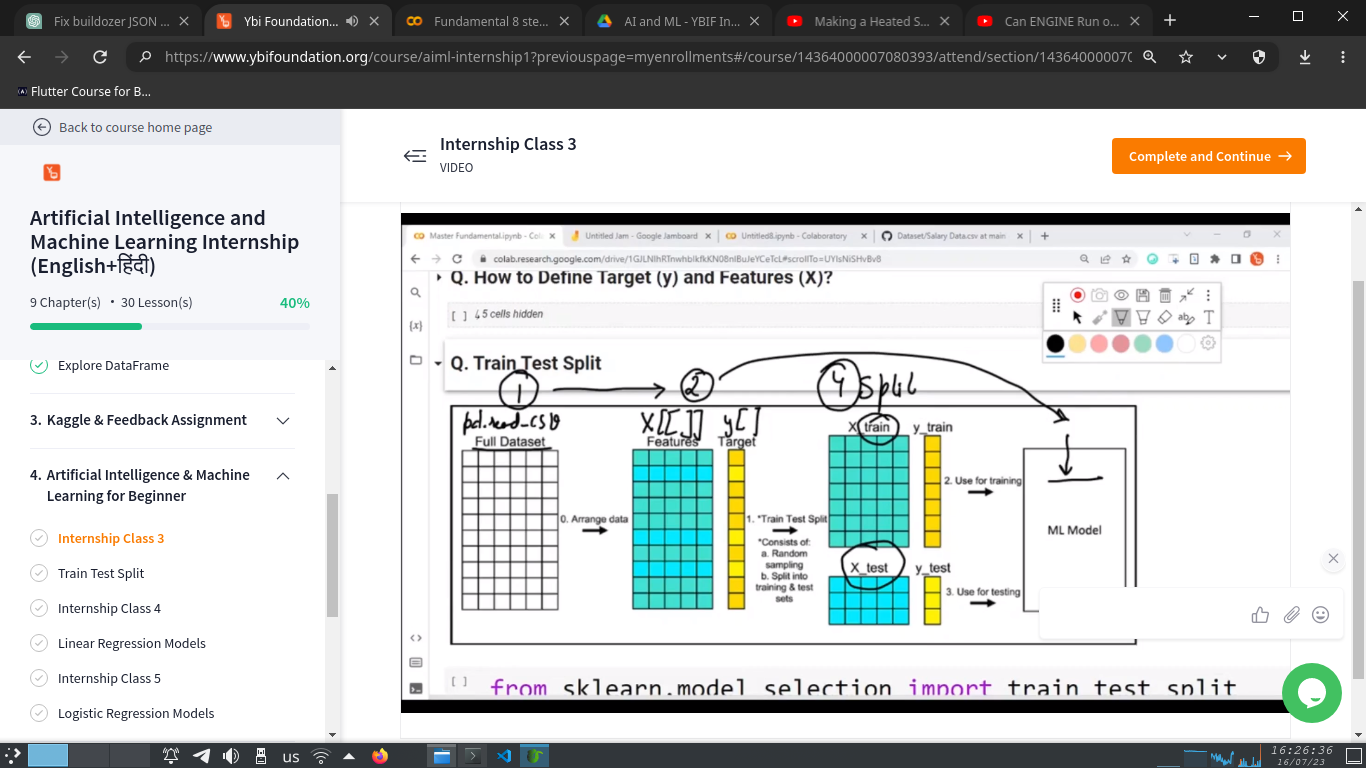
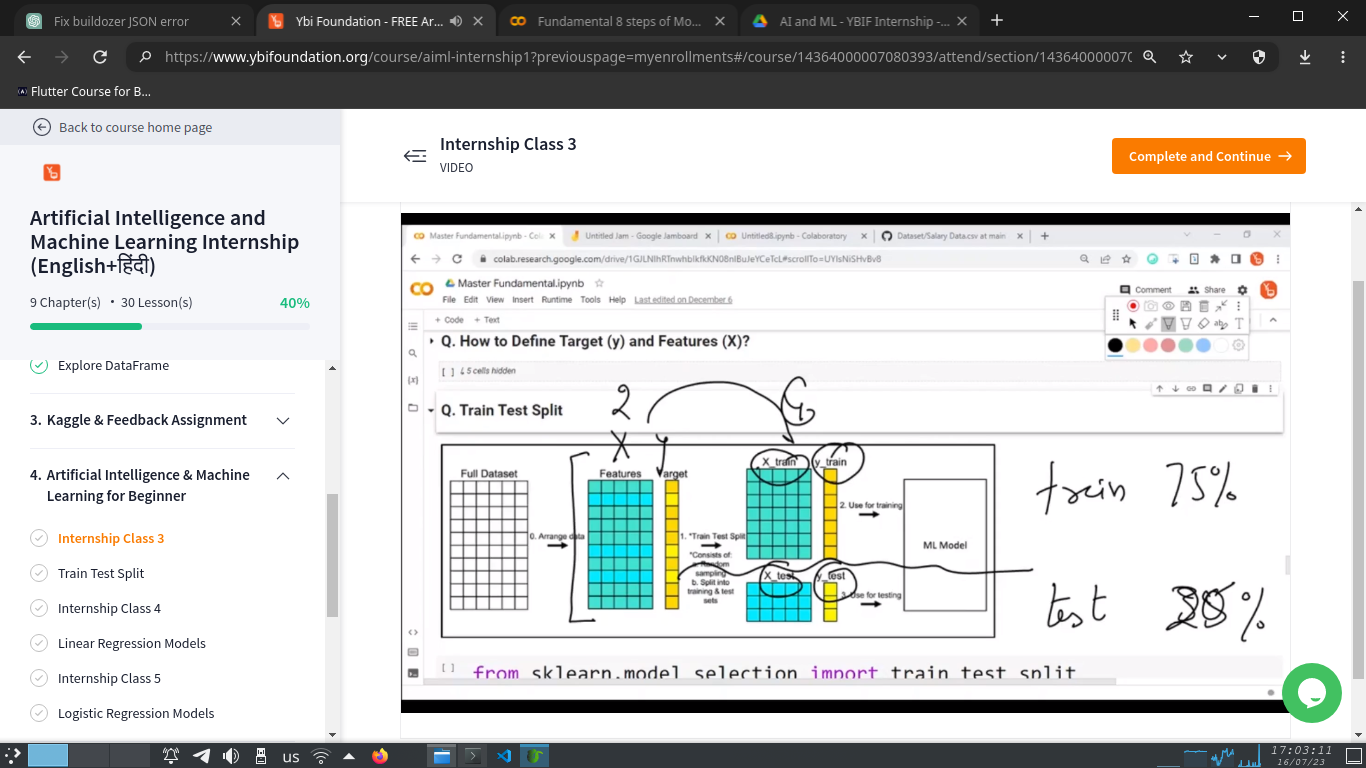

In [13]:
# now that we know that our dependent variable or target is salary and independed variable or feature is experience,
# and by inspecting the nature of our target we can conclude that its a regression problem (i.e. our target is a continuous value)...

# it's time to create a model and for that we would be using the scikit-lean library

## side note: 80% of the problem you are going to face are of classification and regression

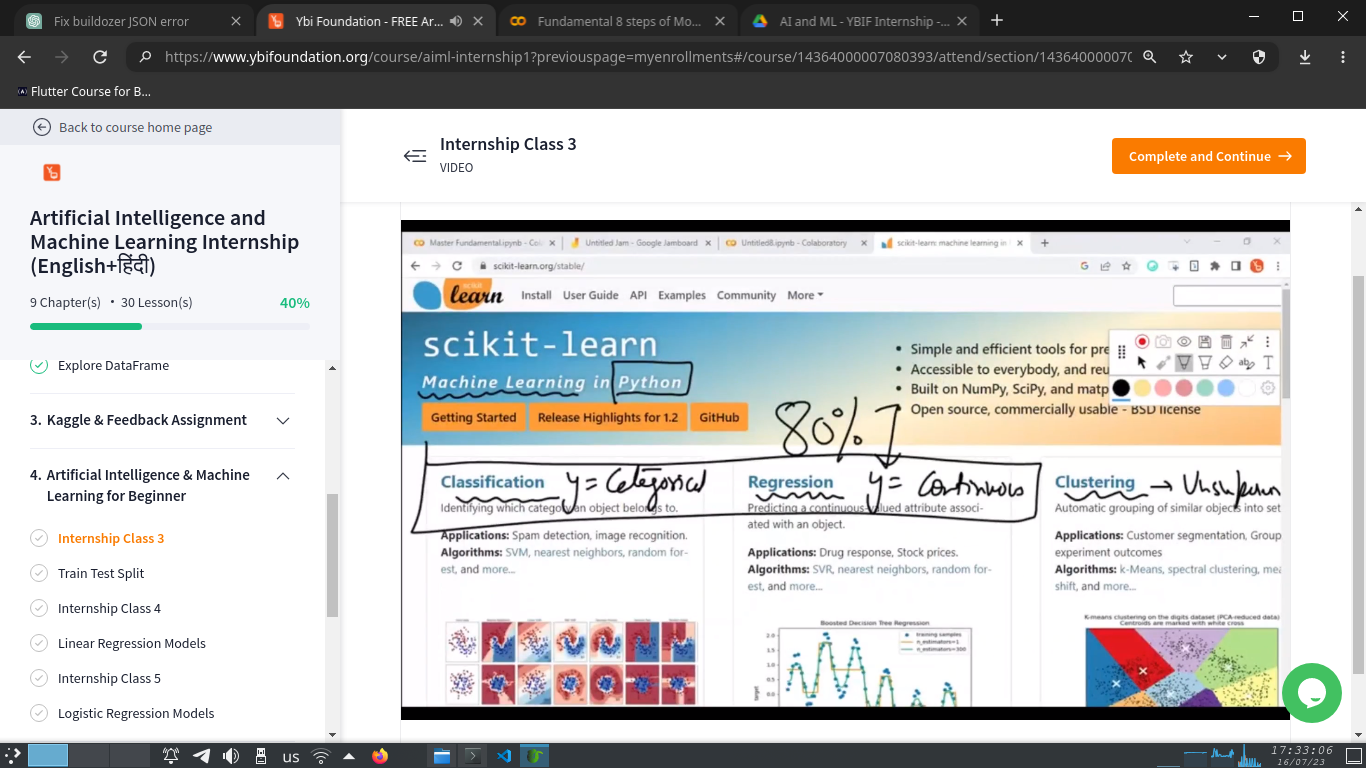

In [14]:
# step 4: test_train_split

In [16]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 1.0 MB/s eta 0:00:000:00:01m eta 0:00:01


In [17]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2529)
# train_size=0.7 implies that the training-testing split factor is 70%-30%

x_train # notice how the set changes every time we run the `train_test_split` function
# BEFORE passing # random_state=2529 to the funtion
# random_state=2529 

,Experience Years
10,3.2
34,8.7
3,1.5
26,6.0
36,9.5
24,5.5
9,3.2
29,6.8
5,2.2
37,9.6


In [32]:
# step 5: selecting the model... but which one? what are the criteria?
# predictive modelling... 
# let's understand the logic/math/operations/steps of "how to" for figuring out salary from experience
# salary is a function of experience

In [33]:
import matplotlib.pyplot as plt

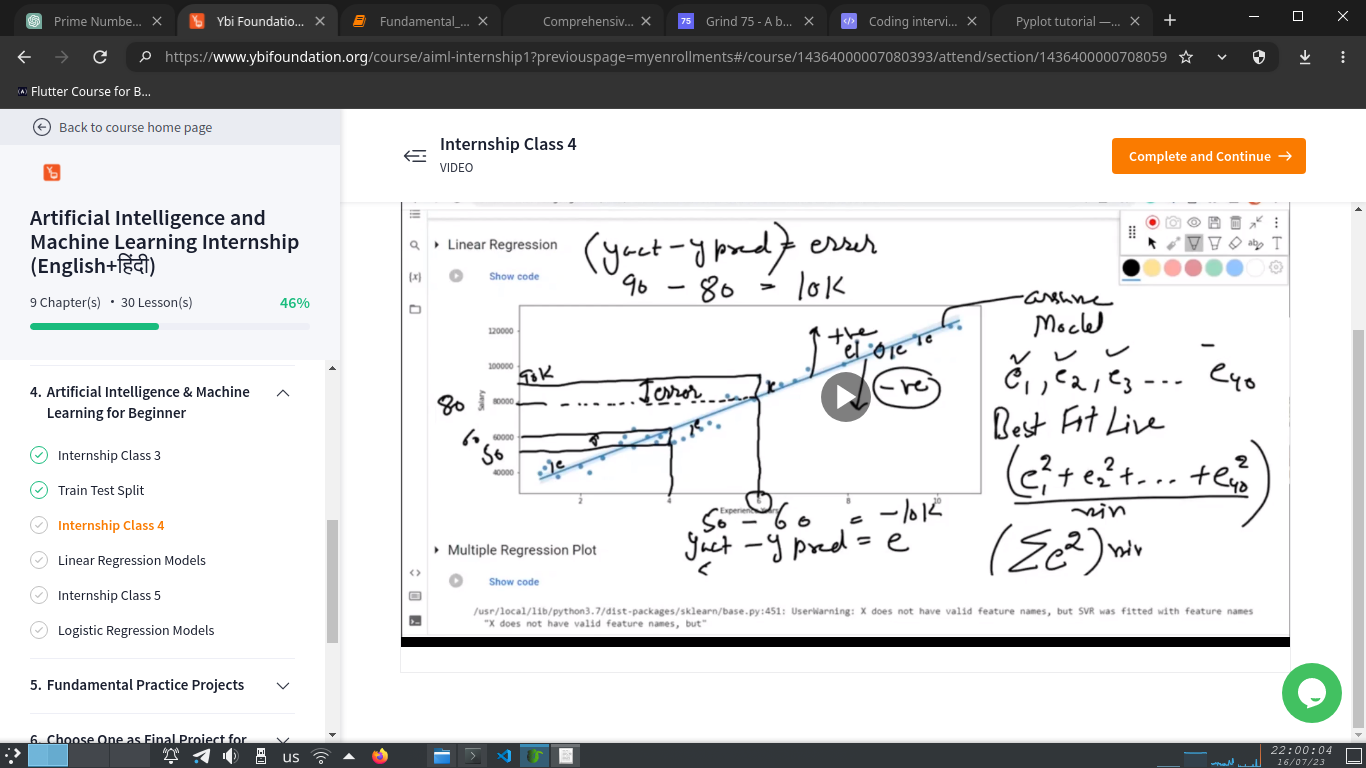

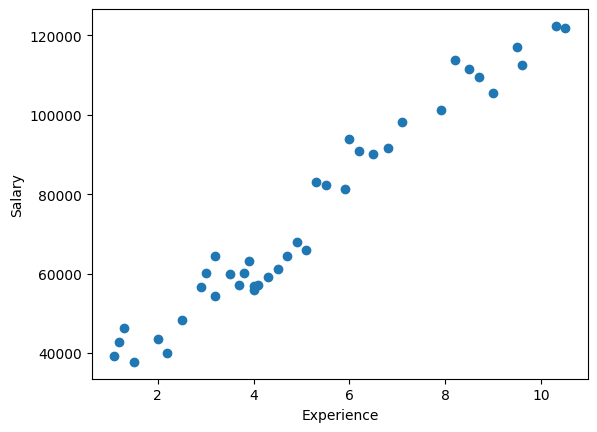

In [41]:
# linear regression is all about fitting a striaght line (NOT a curve) -> this line would be our "model"
# one can fit infinetly many lines to represent the x-y relationship
# how to determine which one is the "best fit"? what logic/criteria is there?
# error = y_actual - y_error -> points below the "best fit" line would have -ve error and +ve for above
# "unique property": least sum of error squared -> hence method is called Ordinary Least Squared method

# but how to find such a line?
# do we just iterate over infinitely many lines lines, keep on calculating error and compare it?
# that seems an every running process...
# more importantly why this method even works? -> one way i like to think about is:
# high error are "amplified" by squaring to a noticeable level,
# and picking up a line with least summation would have the least error


plt.scatter(x, y)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

# y = c + mx = y_intercept + slope*x

# LR is not the only model/mathematical approach to solve such kinds of problem:
# probability, gemetry -> eucledian distance (KNN), entrophy -> themodynamics/noise (decision trees), ensemble model...
# and others can be used to find a "best fit" -> least sum of error

In [45]:
from sklearn.linear_model import LinearRegression

# this LR model will give a intercept and slope
model = LinearRegression()

In [49]:
# step 6: train model (find the best fit)
model.fit(x_train, y_train)
model.intercept_, model.coef_

(26993.545414834836, array([9328.39998309]))

In [73]:
# step 7: prediction
y_pred = model.predict(x_test)

y_pred, model.intercept_ + model.coef_*x_test

(array([ 72702.70533198, 103486.42527618,  45650.34538102,  61508.62535227,
         67105.66534213,  87628.14530493, 124941.74523729, 123076.06524067,
         64307.1453472 ,  93225.18529478]),
     Experience Years
 21      72702.705332
 32     103486.425276
 4       45650.345381
 12      61508.625352
 18      67105.665342
 28      87628.145305
 39     124941.745237
 38     123076.065241
 16      64307.145347
 30      93225.185295)

In [79]:
#step 8: accuracy

# mean of absolute error, mean of squared error, mean of percentage error
from sklearn.metrics import mean_absolute_percentage_error

err = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 - err*100

accuracy

93.41671343934495